In [156]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [157]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# WHO Life Expectancy Data Analysis

- will include short description of all variables
- can include some questions we have that leads to analysis
- final question

## Data Cleaning 
- use of interpolation to fill null data and dropping columns that has large proportion of NULL

In [158]:
df = pd.read_csv('who_life_exp.csv')
df.head()

country country_code  region  year  life_expect  life_exp60  \
0  Angola          AGO  Africa  2000     47.33730    14.73400   
1  Angola          AGO  Africa  2001     48.19789    14.95963   
2  Angola          AGO  Africa  2002     49.42569    15.20010   
3  Angola          AGO  Africa  2003     50.50266    15.39144   
4  Angola          AGO  Africa  2004     51.52863    15.56860   

   adult_mortality  infant_mort  age1-4mort  alcohol  ...  che_gdp    une_pop  \
0         383.5583     0.137985    0.025695  1.47439  ...  1.90860  16395.473   
1         372.3876     0.133675    0.024500  1.94025  ...  4.48352  16945.753   
2         354.5147     0.128320    0.023260  2.07512  ...  3.32946  17519.417   
3         343.2169     0.122040    0.021925  2.20275  ...  3.54797  18121.479   
4         333.8711     0.115700    0.020545  2.41274  ...  3.96720  18758.145   

   une_infant  une_life  une_hiv  une_gni  une_poverty  une_edu_spend  \
0       122.2    46.522      1.0   2530.0         32.3        2.60753   
1       118.9    47.059      1.1   2630.0          NaN            NaN   
2       115.1    47.702      1.2   3180.0          NaN            NaN   
3       110.8    48.440      1.3   3260.0          NaN            NaN   
4       106.2    49.263      1.3   3560.0          NaN            NaN   

   une_literacy  une_school  
0           NaN         NaN  
1      67.40542         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 32 columns]

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [160]:
df.isna().sum()

country               0
country_code          0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mortality       0
infant_mort           0
age1-4mort            0
alcohol              50
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           569
measles              19
polio                19
diphtheria           19
basic_water          32
doctors            1331
hospitals          2981
gni_capita          682
gghe-d              100
che_gdp             117
une_pop              37
une_infant            0
une_life              0
une_hiv             741
une_gni             117
une_poverty        2198
une_edu_spend      1286
une_literacy       2540
une_school         2306
dtype: int64

We decided to drop the UNESCO datasets because there are overlapping predictors with the predictors in GHO datasets. Another reason we choose GHO datasets over UNESCO datasets is because some of them variables in UNESCO has more than 70% null data, eg une_poverty, une_edu_spend, une_literacy, une_school. However, we retained une_pop and une_hiv because these two variables are not found in GHO datasets.


In [161]:
df.drop(['une_infant', 'une_life', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy', 'une_school'], 
        axis = 1, inplace = True)

We decided to drop 'hospital' column because there is 96% of missing values in that column. 
We also dropped 'country code' column because 'country' column itself is enough for reference.

In [162]:
df.drop(['hospitals'], axis = 1, inplace = True)
df.drop(['country_code'], axis = 1, inplace =True)

In [163]:
mortality = pd.DataFrame(df[['adult_mortality', 'infant_mort', 'age1-4mort']])
mortality.head()

adult_mortality  infant_mort  age1-4mort
0         383.5583     0.137985    0.025695
1         372.3876     0.133675    0.024500
2         354.5147     0.128320    0.023260
3         343.2169     0.122040    0.021925
4         333.8711     0.115700    0.020545

The values of adult mortality are rate per 1000 populations thus we convert it into the same format as the other two mortality rate in order to ease the EDA.

In [164]:
for i in range(0, 3111):
    val = df.iloc[i]['adult_mortality']
    adjusted_val = val/1000 
    df.at[i, 'adult_mortality'] = adjusted_val


In [165]:
df.rename(columns = {'adult_mortality':'adult_mort_rate', 'infant_mort':'infant_mort_rate', 'age1-4mort':'age1-4_mort_rate'}, 
          inplace = True)


In [166]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               50
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Checking missing values under 'alcohol' column

In [167]:
df[df['alcohol'].isna()]['country'].value_counts()

South Sudan    17
Sudan          11
Serbia          6
Montenegro      6
Canada          5
Afghanistan     5
Name: country, dtype: int64

In [168]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df[['year','alcohol']]

year  alcohol
1598  2000      NaN
1599  2001      NaN
1600  2002      NaN
1601  2003      NaN
1602  2004      NaN
1603  2005      NaN
1604  2006      NaN
1605  2007      NaN
1606  2008      NaN
1607  2009      NaN
1608  2010      NaN
1609  2011  0.46030
1610  2012  0.00037
1611  2013  0.06335
1612  2014  0.02689
1613  2015  0.01879
1614  2016  0.00786

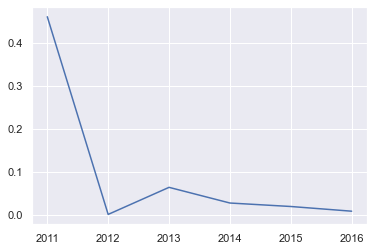

In [169]:
plt.plot('year', 'alcohol', data = sudan_df)

In [170]:
sudan_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

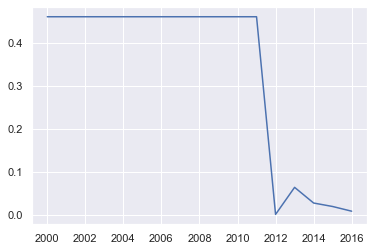

In [171]:
plt.plot('year', 'alcohol', data = sudan_df)

In [172]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])

In [173]:
sudan_df.bfill(inplace = True)

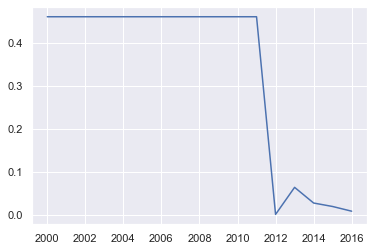

In [174]:
plt.plot('year', 'alcohol', data = sudan_df) 

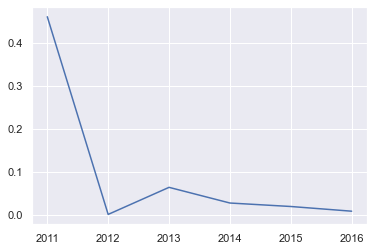

In [175]:
sudan_df = pd.DataFrame(df[df['country'] == 'Sudan'])
sudan_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = sudan_df)

In [176]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])
canada_df[['year','alcohol']]

year  alcohol
1309  2000      NaN
1310  2001      NaN
1311  2002      NaN
1312  2003      NaN
1313  2004      NaN
1314  2005      8.0
1315  2006      8.2
1316  2007      8.3
1317  2008      8.4
1318  2009      8.4
1319  2010      8.3
1320  2011      8.2
1321  2012      8.3
1322  2013      8.2
1323  2014      8.0
1324  2015      8.0
1325  2016      8.1

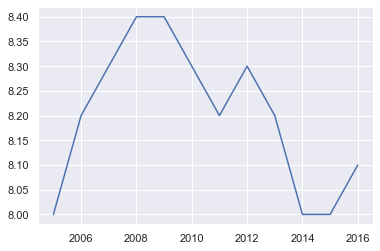

In [177]:
plt.plot('year', 'alcohol', data = canada_df)

In [178]:
canada_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

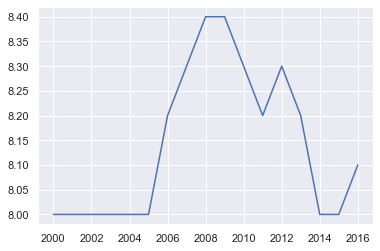

In [179]:
plt.plot('year', 'alcohol', data = canada_df)

In [180]:
canada_df = pd.DataFrame(df[df['country'] == 'Canada'])

In [181]:
canada_df.ffill(inplace = True)

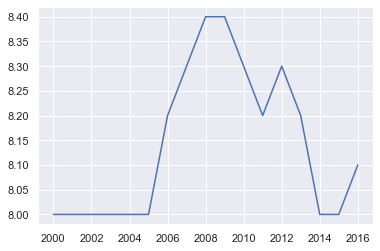

In [182]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)

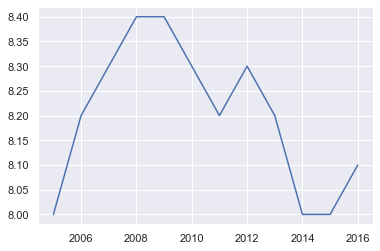

In [183]:
cnd_df = pd.DataFrame(df[df['country'] == 'Canada'])
cnd_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = cnd_df)


In [184]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df[['year','alcohol']]

year  alcohol
1360  2000      NaN
1361  2001      NaN
1362  2002      NaN
1363  2003      NaN
1364  2004      NaN
1365  2005  0.01623
1366  2006  0.02618
1367  2007  0.01801
1368  2008  0.02756
1369  2009  0.00972
1370  2010  0.01150
1371  2011  0.00992
1372  2012  0.00984
1373  2013  0.00977
1374  2014  0.00799
1375  2015  0.00222
1376  2016  0.01652

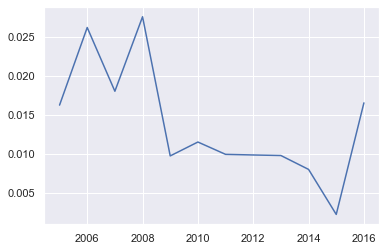

In [185]:
plt.plot('year', 'alcohol', data = afg_df)

In [186]:
afg_df['alcohol'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

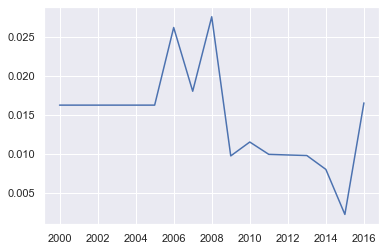

In [187]:
plt.plot('year', 'alcohol', data = afg_df)

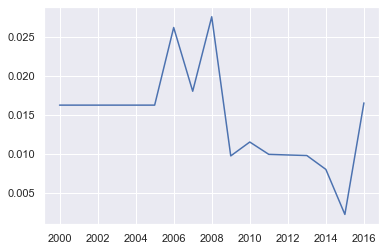

In [188]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.bfill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

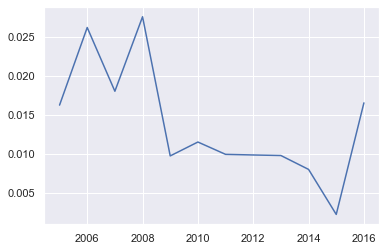

In [189]:
afg_df = pd.DataFrame(df[df['country'] == 'Afghanistan'])
afg_df.ffill(inplace = True)
plt.plot('year', 'alcohol', data = afg_df)

Analysis : It is obvious that no trend can be observed from the above plot as the years given to observe the trend of the data are too few and also the missing values are usually appear to be missing in consecutive years. In addition to this, we realisedt that forward filling is not working in this case and this indicates that backward filling might also not working for other cases. Thus, interpolation with linear method and both directin will be the better method to fill in the missing values as it is able to fill in missing values which appears to be in the recent years or in the earliest year. Furthermore, if the missing values are more than 10 for a country, we tend not to fill in the null values as too few of available datas to be used as reference for filling in the missing values and might contribute to low accuracy. 

In [190]:
#ask
countries = df[df['alcohol'].isna()]['country'].unique().tolist()

In [191]:
for country in countries:
    if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc('alcohol')
        alcohol_df = pd.DataFrame(df.iloc[row_index, col_index])
        alcohol_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = alcohol_df

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_3316/3723828569.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df['alcohol'].isna()][df['country'] == country]) > 10:


In [192]:
df.isna().sum()

country                0
region                 0
year                   0
life_expect            0
life_exp60             0
adult_mort_rate        0
infant_mort_rate       0
age1-4_mort_rate       0
alcohol               28
bmi                   34
age5-19thinness       34
age5-19obesity        34
hepatitis            569
measles               19
polio                 19
diphtheria            19
basic_water           32
doctors             1331
gni_capita           682
gghe-d               100
che_gdp              117
une_pop               37
une_hiv              741
dtype: int64

## Define a method to fill the null values with the condition that if missing values for one country are more than 10 then the null values will be retained

In [193]:
def fill_na(pred, country):
    if len(df[df[pred].isna()][df['country'] == country]) > 10:
        pass
    else:
        row_index = df[df['country'] == country].index
        col_index = df.columns.get_loc(pred)
        pred_df = pd.DataFrame(df.iloc[row_index, col_index])
        pred_df.interpolate(method = 'linear', limit_direction = 'both', inplace = True)
        df.iloc[row_index, col_index] = pred_df

In [194]:
df[df['bmi'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [195]:
df[df['age5-19thinness'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

In [196]:
df[df['age5-19obesity'].isna()]['country'].value_counts()

South Sudan    17
Sudan          17
Name: country, dtype: int64

To check if the fill_na method works well on other datasets as well.

In [197]:
df[df['hepatitis'].isna()]['country'].value_counts()

Slovenia                                                17
United Kingdom of Great Britain and Northern Ireland    17
Switzerland                                             17
Japan                                                   17
Finland                                                 17
                                                        ..
Guyana                                                   1
Barbados                                                 1
Australia                                                1
Russian Federation                                       1
Grenada                                                  1
Name: country, Length: 99, dtype: int64

In [198]:
aus_df = pd.DataFrame(df[df['country'] == 'Australia'])

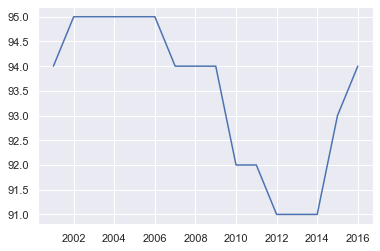

In [199]:
plt.plot('year', 'hepatitis', data = aus_df)

In [200]:
aus_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

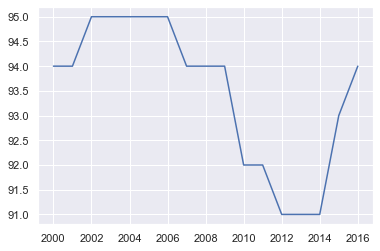

In [201]:
plt.plot('year', 'hepatitis', data = aus_df)

In [202]:
pnm_df = pd.DataFrame(df[df['country'] == 'Panama'])

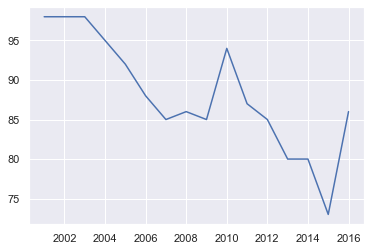

In [203]:
plt.plot('year', 'hepatitis', data = pnm_df)

In [204]:
pnm_df['hepatitis'].interpolate(method = 'linear', limit_direction = 'both', inplace = True)

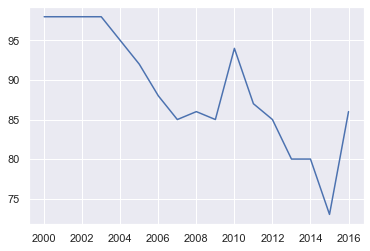

In [205]:
plt.plot('year', 'hepatitis', data = pnm_df)

Conclusion : The fill_na method can be used thus we will just generate a list of variables with null value and fill in the null values if condition is met

In [206]:
countries = df[df['hepatitis'].isna()]['country'].unique().tolist()

In [207]:
for country in countries:
    fill_na('hepatitis', country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_3316/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [208]:
null_pred = df.columns[df.isna().any()].tolist()
null_pred.remove('alcohol')
null_pred.remove('bmi')
null_pred.remove('age5-19thinness')
null_pred.remove('age5-19obesity')
null_pred.remove('hepatitis')

In [209]:
null_pred

['measles',
 'polio',
 'diphtheria',
 'basic_water',
 'doctors',
 'gni_capita',
 'gghe-d',
 'che_gdp',
 'une_pop',
 'une_hiv']

In [210]:
for pred in null_pred:
    countries = df[df[pred].isna()]['country'].unique().tolist()
    for country in countries:
        fill_na(pred, country)

C:\Users\BONGJI~1\AppData\Local\Temp/ipykernel_3316/438080508.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(df[df[pred].isna()][df['country'] == country]) > 10:


In [211]:
df.isna().sum()

country               0
region                0
year                  0
life_expect           0
life_exp60            0
adult_mort_rate       0
infant_mort_rate      0
age1-4_mort_rate      0
alcohol              28
bmi                  34
age5-19thinness      34
age5-19obesity       34
hepatitis           230
measles              11
polio                11
diphtheria           11
basic_water          11
doctors             895
gni_capita          107
gghe-d               68
che_gdp              85
une_pop              31
une_hiv             731
dtype: int64

# EDA for categorical variables (region, country)

In [282]:
print(df["region"].value_counts())

Europe                   850
Africa                   799
Americas                 561
Eastern Mediterranean    357
Western Pacific          357
South-East Asia          187
Name: region, dtype: int64


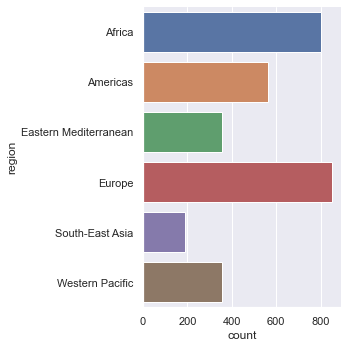

In [283]:
sb.catplot(y = "region", data = df, kind = "count")

<AxesSubplot:xlabel='life_expect', ylabel='region'>

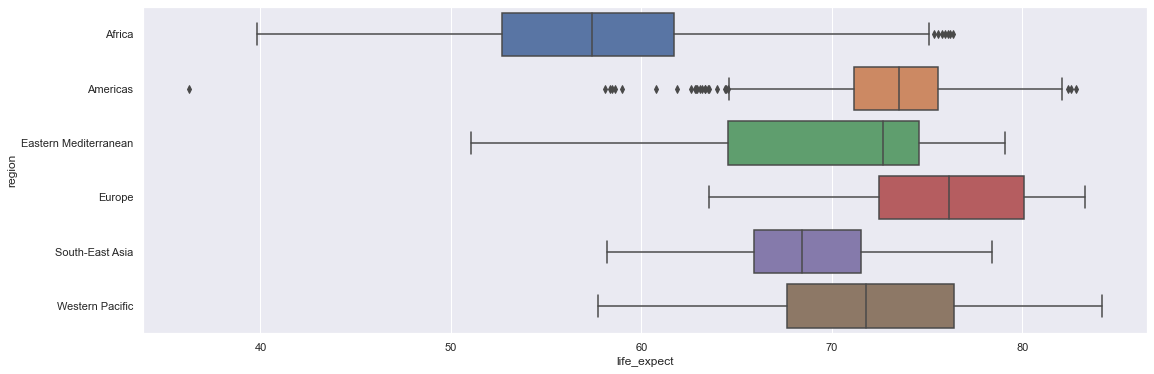

In [284]:
regionDF = pd.concat([df['region'], df['life_expect']], axis = 1).reindex(df['region'].index)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "life_expect", y = "region", data = regionDF, orient = "h")


Insights: Box-plot for each region seems to be distinct from another.
Has distinct distribution among the different regions.

We decided to make a simple model so that the predicted life expectancy we obtained from machine learning (as below) can be used to predict the likely region the data lies in.

We concluded that the dataset is relatively balanced so we went ahead to construct the model via KNearestNeighbors.


In [311]:
from sklearn.model_selection import train_test_split
regionDf = pd.DataFrame(df['region'])
leDf = pd.DataFrame(df['life_expect'])

X_train, X_test, y_train, y_test = train_test_split(leDf, regionDf, test_size = 0.25, random_state = 0)

print("Train Set:", y_train.shape, X_train.shape)
print("Test Set:", y_test.shape, X_test.shape)
print()

Train Set: (2333, 1) (2333, 1)
Test Set: (778, 1) (778, 1)



In [312]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(100,1001,100)}
knnGrid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')

knnGrid.fit(X_train, y_train['region'].ravel())

print(knnGrid.best_estimator_)
print(np.abs(knnGrid.best_score_))
    

KNeighborsClassifier(n_neighbors=600)
0.5032193436325372


In [313]:
knn = KNeighborsClassifier(n_neighbors=600)
knn.fit(X_train, y_train.region.ravel())

KNeighborsClassifier(n_neighbors=600)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.503643377625375
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.519280205655527


<AxesSubplot:>

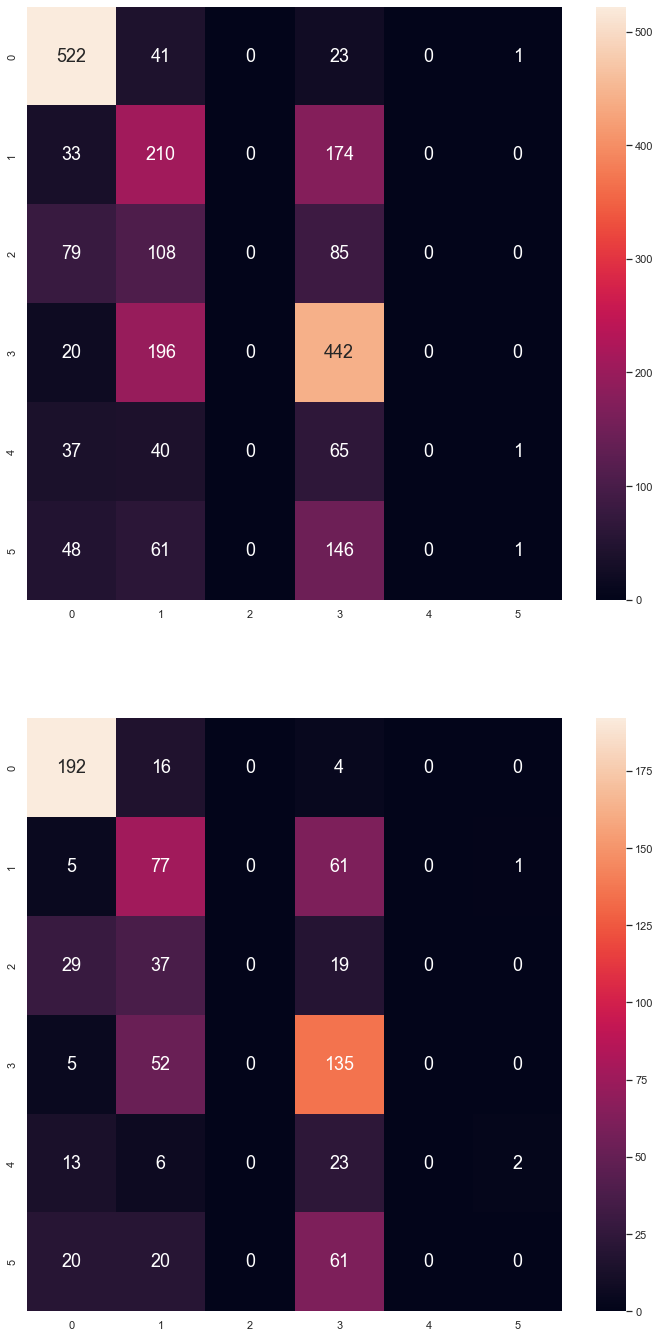

In [316]:
from sklearn.metrics import confusion_matrix

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

f, axes = plt.subplots(2, 1, figsize=(12, 24))

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn.score(X_train, y_train))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", knn.score(X_test, y_test))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])





We observed that there is no predicted values for certain regions. Hence, we decided to resample the data using oversampling and undersampling to achieve a consistent number of 500 across all regions to see if the model can be improved.

## Resample to obtain balanced dataset

https://datascience.stackexchange.com/questions/57882/resampling-for-imbalaced-datasets-should-testing-set-also-be-resampled

In [270]:
from sklearn.utils import resample

df_Europe = df[df['region']=='Europe']
df_Americas = df[df['region']=='Americas']
df_EM = df[df['region']=='Eastern Mediterranean']
df_Africa = df[df['region']=='Africa']
df_SEA = df[df['region']=='South-East Asia']
df_WP = df[df['region']=='Western Pacific']

# upsample classes with <500 data
df_EM_up = resample(df_EM, replace=True, n_samples= 500, random_state=42) 
df_SEA_up = resample(df_SEA, replace=True, n_samples= 500, random_state=42) 
df_WP_up = resample(df_WP, replace=True, n_samples= 500, random_state=42) 

# downsample classes with >500 data
df_Europe_down =  resample(df_Europe, replace=True, n_samples= 500, random_state=42) 
df_Americas_down =  resample(df_Americas, replace=True, n_samples= 500, random_state=42) 
df_Africa_down =  resample(df_Africa, replace=True, n_samples= 500, random_state=42) 

df_resampled = pd.concat([df_EM_up, df_WP_up, df_SEA_up, df_Europe_down,df_Americas_down,df_Africa_down])
pd.set_option('display.max_rows', 3000)
display(df_resampled)

country  \
1462                                            Somalia   
1708                                            Morocco   
1630                                               Iraq   
1466                                            Somalia   
1431                                              Egypt   
1548                                           Pakistan   
1380                               United Arab Emirates   
1462                                            Somalia   
1481                               Syrian Arab Republic   
1574                                              Qatar   
1690                                              Libya   
1447                         Iran (Islamic Republic of)   
1459                         Iran (Islamic Republic of)   
1511                                            Tunisia   
1490                               Syrian Arab Republic   
1509                                            Tunisia   
1668                                            Lebanon   
1617                                               Iraq   
1703                                            Morocco   
1653                                             Kuwait   
1551                                           Pakistan   
1636                                             Jordan   
1520                                              Yemen   
1673                                            Lebanon   
1381                               United Arab Emirates   
1612                                              Sudan   
1595                                       Saudi Arabia   
1704                                            Morocco   
1408                                            Bahrain   
1418                                           Djibouti   
1529                                              Yemen   
1547                                           Pakistan   
1630                                               Iraq   
1549                                           Pakistan   
1534                                               Oman   
1410                                            Bahrain   
1414                                           Djibouti   
1603                                              Sudan   
1679                                            Lebanon   
1490                               Syrian Arab Republic   
1666                                            Lebanon   
1494                               Syrian Arab Republic   
1380                               United Arab Emirates   
1688                                              Libya   
1526                                              Yemen   
1633                                             Jordan   
1448                         Iran (Islamic Republic of)   
1675                                            Lebanon   
1373                                        Afghanistan   
1601                                              Sudan   
1624                                               Iraq   
1705                                            Morocco   
1412                                           Djibouti   
1699                                              Libya   
1451                         Iran (Islamic Republic of)   
1623                                               Iraq   
1394                                            Bahrain   
1565                                              Qatar   
1440                                              Egypt   
1409                                            Bahrain   
1361                                        Afghanistan   
1413                                           Djibouti   
1465                                            Somalia   
1619                                               Iraq   
1669                                            Lebanon   
1550                                           Pakistan   
1577                                              Qatar   
1403                                

In [271]:
df_resampled['region'].value_counts()

Eastern Mediterranean    500
Western Pacific          500
South-East Asia          500
Europe                   500
Americas                 500
Africa                   500
Name: region, dtype: int64

In [306]:
regionDf = pd.DataFrame(df['region'])
leDf = pd.DataFrame(df['life_expect'])

X_train, X_test, y_train, y_test = train_test_split(leDf, regionDf, test_size = 0.25, random_state = 0)

print("Train Set:")
print(y_train['region'].value_counts())
print()
print("Test Set:")
print(y_test['region'].value_counts())

Train Set:
Europe                   658
Africa                   587
Americas                 417
Eastern Mediterranean    272
Western Pacific          256
South-East Asia          143
Name: region, dtype: int64

Test Set:
Africa                   212
Europe                   192
Americas                 144
Western Pacific          101
Eastern Mediterranean     85
South-East Asia           44
Name: region, dtype: int64


In [310]:
#Resampling Train dataset

train_df = pd.concat([X_train,y_train])
train_df


life_expect                 region
37       56.37336                    NaN
425      48.45472                    NaN
879      78.95298                    NaN
2535     80.48344                    NaN
1581     72.66631                    NaN
...           ...                    ...
763           NaN                 Africa
835           NaN               Americas
1653          NaN  Eastern Mediterranean
2607          NaN        South-East Asia
2732          NaN        South-East Asia

[4666 rows x 2 columns]

In [ ]:
print("Train Set:", y_train.shape, X_train.shape)
print("Test Set:", y_test.shape, X_test.shape)
print()

In [275]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(100,1001,100)}
knnGrid = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')

knnGrid.fit(X_train, y_train['region'].ravel())

print(knnGrid.best_estimator_)
print(np.abs(knnGrid.best_score_))
    

KNeighborsClassifier(n_neighbors=300)
0.43822222222222224


In [276]:
knn = KNeighborsClassifier(n_neighbors=110)
knn.fit(X_train, y_train.region.ravel())

KNeighborsClassifier(n_neighbors=110)

Train Data
Accuracy  :	 0.4524444444444444



<AxesSubplot:>

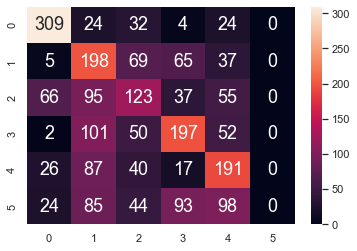

In [277]:
y_train_pred = knn.predict(X_train)

print("Train Data")
print("Accuracy  :\t", knn.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Machine Learning
1) Multiple Linear Regression
2) RandomForestRegressor

## Preparing and standardising train and test datasets for machine learning

In [ ]:
ml_df = pd.DataFrame(df.drop([ 'year', 'country', 'region'], axis=1))

#1)dropping the whole row if any null - ensure same number of data for each predictor
clean_ml_df = ml_df.dropna()
clean_ml_df



Insights:
Will take life_expect and life_exp60 as response variables for machine learning and compare to see if there is any difference

Obvious that life_exp60 will be most highly correlated with life_expect (maybe EDA will show the same result also need check) + both have similar derivations

In [ ]:
#creating Train and Test datasets for Regression
from sklearn.model_selection import train_test_split

y_le = pd.DataFrame(clean_ml_df['life_expect'])
y_le60 = pd.DataFrame(clean_ml_df['life_exp60'])
X = pd.DataFrame(clean_ml_df.drop(['life_expect', 'life_exp60'], axis=1))

#ensuring same splits for comparison after machine learning
X_train, X_test, y_train_le, y_test_le = train_test_split(X, y_le, test_size = 0.25, random_state = 0)
X_train, X_test, y_train_le60, y_test_le60 = train_test_split(X, y_le60, test_size = 0.25, random_state = 0)

print("Train Set for y=life_expect:", y_train_le.shape, X_train.shape)
print("Test Set for y=life_expect:", y_test_le.shape, X_test.shape)
print()
print("Train Set for y=life_exp60:", y_train_le60.shape, X_train.shape)
print("Test Set for y=life_exp60:", y_test_le60.shape, X_test.shape)

## Model 1: Multi-Variate Regression
https://blog.minitab.com/en/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables
https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

### Analysing response = life_expect dataset

In [ ]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train_le) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



In [ ]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of the life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error

print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### Analysing response = life_exp60 dataset

In [ ]:


linreg = LinearRegression()
linreg.fit(X_train, y_train_le60) 

print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors in order of decreasing abs(coefficients)
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key = abs)



In [ ]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()


print("----------For Response = life_exp60----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

### Analysing with only top 3 predictors

In [ ]:
y = pd.DataFrame(clean_ml_df['life_expect'])
X = pd.DataFrame(clean_ml_df[['age1-4_mort_rate','adult_mort_rate','infant_mort_rate']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

linreg = LinearRegression()  
linreg.fit(X_train, y_train) 

print()
print('Intercept of Regression: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]).sort_values(by=['Coefficients'], ascending=False, key=abs)

In [ ]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Model 2: RandomForestRegressor
# ask about getting coefficient of parameters

### Analysing response = life_expect dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

In [ ]:
#using best hyperparameter

rfr = RandomForestRegressor(n_estimators = 600,  max_depth = 9, random_state=0)     

# Fit Random Forest on Train Data
rfr.fit(X_train, y_train_le['life_expect'].ravel())


In [ ]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [ ]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

### Analysing response = life_exp60 dataset

In [ ]:
estimator = RandomForestRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(100,1001,100),  'max_depth': np.arange(2, 11)}   

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))


In [ ]:
rfr = RandomForestRegressor(n_estimators = 1000,  max_depth = 8, random_state=0)     

rfr.fit(X_train, y_train_le60['life_exp60'].ravel())

In [ ]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [ ]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()

## Model 3: Gradient Boosting Regressor

### Analysing response = life_expect dataset

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le['life_expect'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 70,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le['life_expect'].ravel())

In [ ]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le, y_train_pred, color = "blue")
axes[0].plot(y_train_le, y_train_le, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at birth (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at birth (Train)")
axes[1].scatter(y_test_le, y_test_pred, color = "green")
axes[1].plot(y_test_le, y_test_le, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at birth (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at birth (Test)")
plt.show()

In [ ]:
print("-----------For Response = life_expect-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_train, y_train_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rfr.score(X_test, y_test_le))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le, y_test_pred))
print()

### Analysing response = life_exp60 dataset

In [ ]:
estimator = GradientBoostingRegressor(random_state=0) 
param_grid = {'n_estimators': np.arange(10,100,10),  'max_depth': np.arange(2, 11)}    #check what should be the ideal range of n_estimators

grid = GridSearchCV(estimator, param_grid, cv=3, scoring='r2')

grid.fit(X_train, y_train_le60['life_exp60'].ravel())

print(grid.best_estimator_)
print(np.abs(grid.best_score_))

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 30,  max_depth = 5, random_state=0)     

gbr.fit(X_train, y_train_le60['life_exp60'].ravel())

In [ ]:
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_le60, y_train_pred, color = "blue")
axes[0].plot(y_train_le60, y_train_le60, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of life expectancy at 60 (Train)")
axes[0].set_ylabel("Predicted values of life expectancy at 60 (Train)")
axes[1].scatter(y_test_le60, y_test_pred, color = "green")
axes[1].plot(y_test_le60, y_test_le60, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of life expectancy at 60 (Test)")
axes[1].set_ylabel("Predicted values of life expectancy at 60 (Test)")
plt.show()

In [ ]:
print("-----------For Response = life_exp60-----------")
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_train, y_train_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_le60, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", gbr.score(X_test, y_test_le60))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_le60, y_test_pred))
print()